<a href="https://colab.research.google.com/github/MichaelSchmidt1729/training-book/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn
print(seaborn.__version__)

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
titanic_df = pd.read_csv('/content/drive/MyDrive/Datasets/titanic.csv')

----1----
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

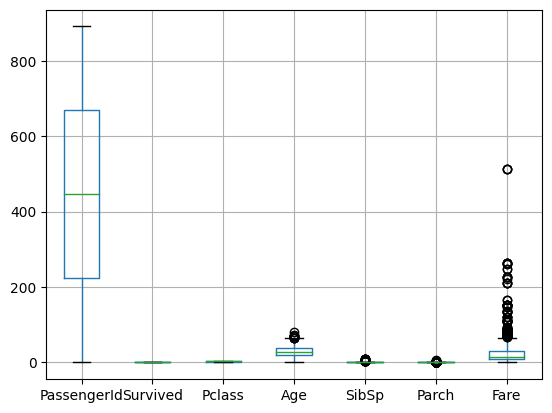

In [ ]:
print("----1----")
print(titanic_df.head())
print("----2----")
print(titanic_df.info())
print("----3----")
print(titanic_df.describe())
print("----4----")
column_names = list(titanic_df)
print(column_names)
print("----5----")
print(titanic_df.boxplot())

In [ ]:
# Number of passengers in each class
titanic_df.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

In [ ]:
# Instead of a group by, use seaborn to plot the count of passengers in each class
fg = sns.catplot('Pclass', data=titanic_df, kind='count', aspect=1.5)
fg.set_xlabels('Class')

TypeError: catplot() got multiple values for argument 'data'

In [ ]:
titanic_df.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

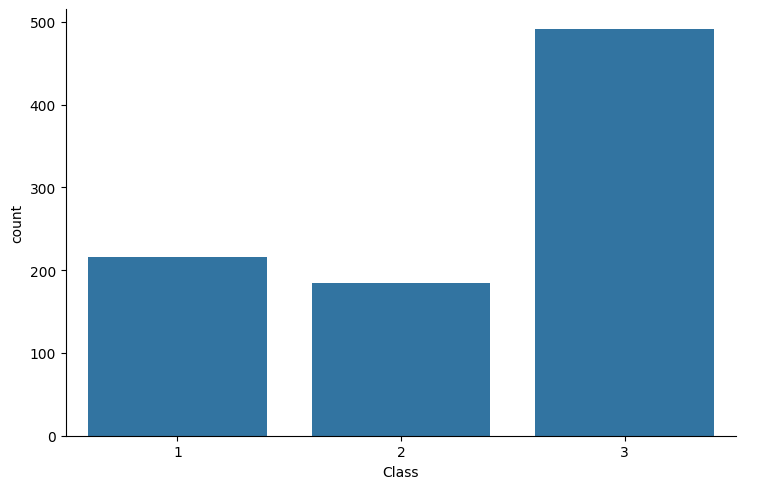

In [ ]:
# Instead of a group by, use seaborn to plot the count of passengers in each class
fg = sns.catplot(x='Pclass', data=titanic_df, kind='count', aspect=1.5)
fg.set_xlabels('Class')

In [ ]:
# Number of men and women in each of the passenger class
titanic_df.groupby(['Sex', 'Pclass'])['Sex'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Sex, dtype: int64

In [ ]:
# Number of passengers who survived in each class grouped by sex. Also total was found for each class grouped by sex.
titanic_df.pivot_table(aggfunc=np.sum, x='Survived', 'Sex', 'Pclass')

SyntaxError: positional argument follows keyword argument (<ipython-input-46-9271822d85f0>, line 2)

In [ ]:
not_survived = titanic_df[titanic_df['Survived']==0]

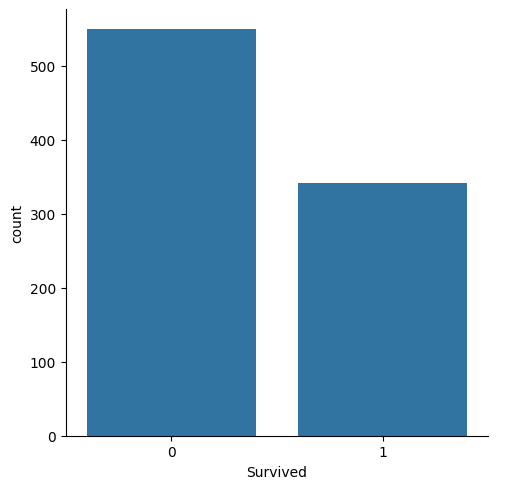

In [ ]:
# Factor plot of those who survived vs. who didn't
sns.catplot(x='Survived', data=titanic_df, kind='count')

In [ ]:
# Passengers who survived and who didn't survive grouped by class and sex
table = pd.crosstab(index=[titanic_df.Survived,titanic_df.Pclass], columns=[titanic_df.Sex,titanic_df.Embarked])

In [ ]:
table.unstack()

Sex      female                              male                           \
Embarked      C         Q          S            C         Q          S       
Pclass        1  2   3  1  2   3   1   2   3    1  2   3  1  2   3   1   2   
Survived                                                                     
0             1  0   8  0  0   9   2   6  55   25  8  33  1  1  36  51  82   
1            42  7  15  1  2  24  46  61  33   17  2  10  0  0   3  28  15   

Sex            
Embarked       
Pclass      3  
Survived       
0         231  
1          34

In [ ]:
table.columns, table.index

(MultiIndex([('female', 'C'),
             ('female', 'Q'),
             ('female', 'S'),
             (  'male', 'C'),
             (  'male', 'Q'),
             (  'male', 'S')],
            names=['Sex', 'Embarked']),
 MultiIndex([(0, 1),
             (0, 2),
             (0, 3),
             (1, 1),
             (1, 2),
             (1, 3)],
            names=['Survived', 'Pclass']))

In [ ]:
# Change name of columns
table.columns.set_levels(['Female', 'Male'], level=0, inplace=True)
table.columns.set_levels(['Cherbourg','Queenstown','Southampton'], level=1, inplace=True)
table

<ipython-input-40-2742b94c6367>:2: FutureWarning: inplace is deprecated and will be removed in a future version.
  table.columns.set_levels(['Female', 'Male'], level=0, inplace=True)
<ipython-input-40-2742b94c6367>:3: FutureWarning: inplace is deprecated and will be removed in a future version.
  table.columns.set_levels(['Cherbourg','Queenstown','Southampton'], level=1, inplace=True)


Sex                Female                             Male             \
Embarked        Cherbourg Queenstown Southampton Cherbourg Queenstown   
Survived Pclass                                                         
0        1              1          0           2        25          1   
         2              0          0           6         8          1   
         3              8          9          55        33         36   
1        1             42          1          46        17          0   
         2              7          2          61         2          0   
         3             15         24          33        10          3   

Sex                          
Embarked        Southampton  
Survived Pclass              
0        1               51  
         2               82  
         3              231  
1        1               28  
         2               15  
         3               34

In [ ]:
print('Average and median age of passengers are %0.f and %0.f years old, respectively'%(titanic_df.Age.mean(), titanic_df.Age.median()))

Average and median age of passengers are 30 and 28 years old, respectively


In [ ]:
titanic_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
# Drop missing values for the records in which age passenger is missing
age = titanic_df['Age'].dropna()

<ipython-input-50-265df94155a1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  age_dist = sns.distplot(age)


Text(0.5, 1.0, "Distribution of Passengers' Ages")

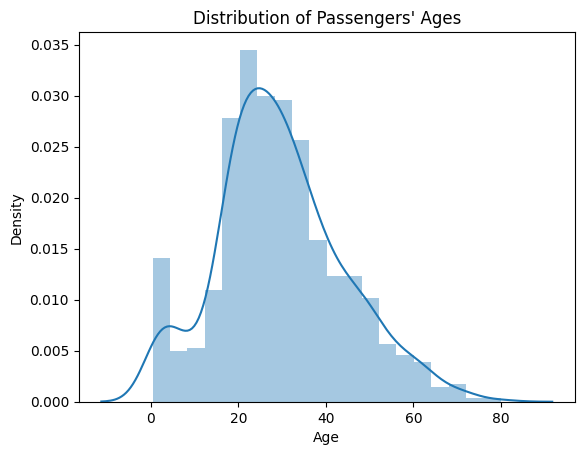

In [ ]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Passengers' Ages")

<Axes: >

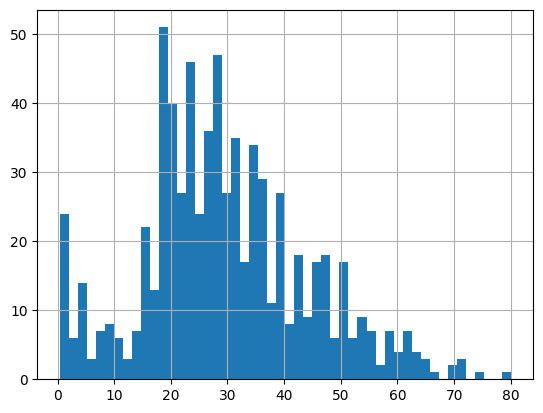

In [ ]:
# Another way to plot a histogram of ages is shown below
titanic_df['Age'].hist(bins=50)

In [ ]:
titanic_df['Parch'].dtype, titanic_df['SibSp'].dtype, len(titanic_df.Cabin.dropna())

(dtype('int64'), dtype('int64'), 204)

In [ ]:
# Create a function to define those who are children (less than 16)
def male_female_child(passenger):
    age, sex = passenger

    if age < 16:
        return 'child'
    else:
        return sex

In [ ]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [ ]:
# Lets have a look at the first 10 rows of the data frame
titanic_df[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


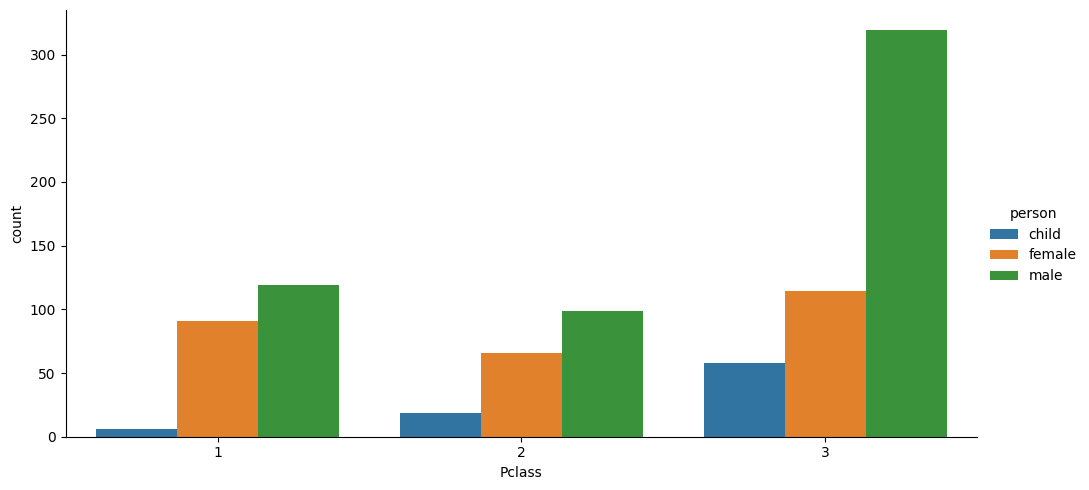

In [ ]:
# Lets do a factorplot of passengers splitted into sex, children and class
sns.catplot(x='Pclass', data=titanic_df, kind='count', hue='person', order=[1,2,3],
               hue_order=['child','female','male'], aspect=2)

In [ ]:
# Count number of men, women and children
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

AttributeError: Rectangle.set() got an unexpected keyword argument 'size'

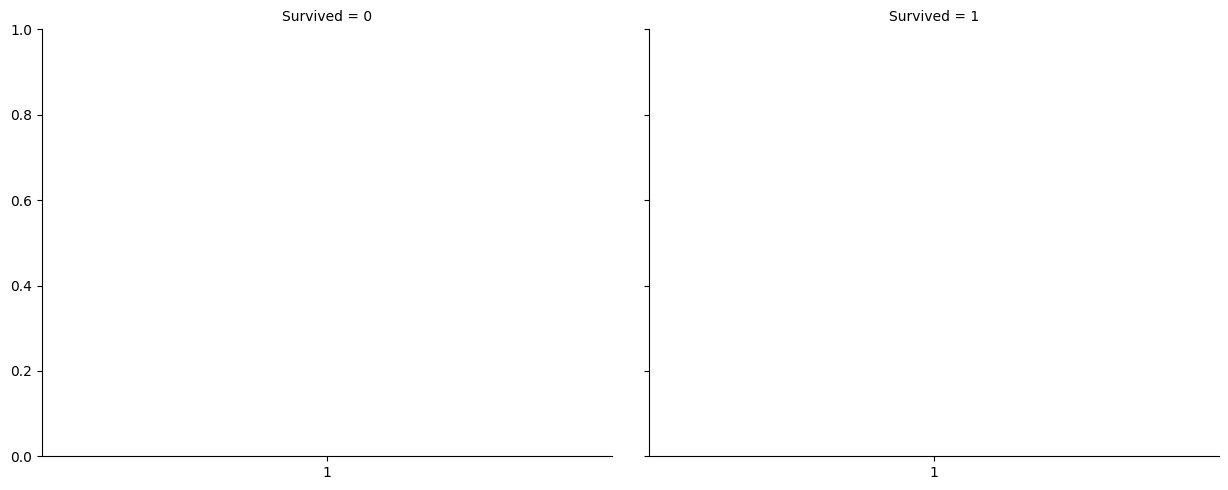

In [ ]:
# Do the same as above, but split the passengers into either survived or not
sns.catplot(x='Pclass', data=titanic_df, kind='count', hue='person', col='Survived', order=[1,2,3], hue_order=['child','female','male'], aspect=1.25, size=5)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


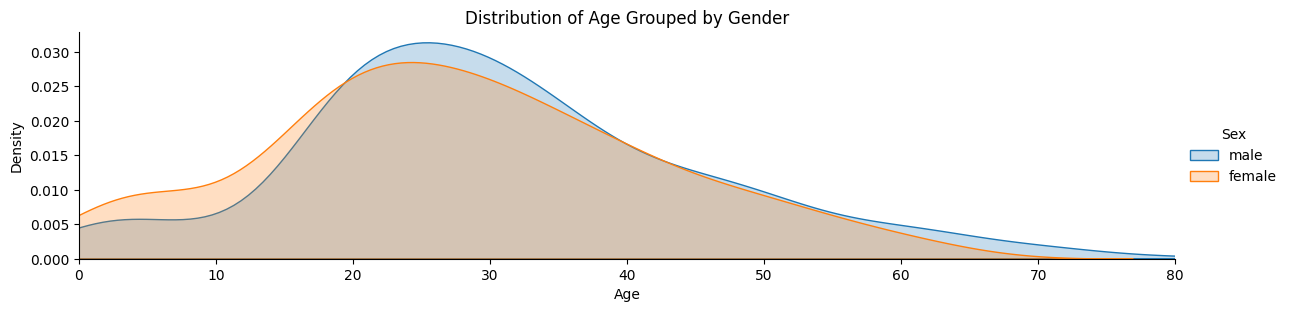

In [ ]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()